In [1]:
print("Hello")

Hello


# Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.model_selection import learning_curve

# Import Dataset

In [241]:
data = pd.read_csv('DataSet/house_price_dataset_original_v2_with_categorical_features.csv')

In [242]:
data.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket,crime_rate_index,room_size,property_value
0,201 sqm,177 sqm,3,1,No,Yes,Yes,No,3.3km,Yes,10 Years,No,6.8 km,0.90,small,165432
1,196 sqm,182 sqm,4,3,Yes,Yes,No,Yes,1.2km,Yes,11 Years,No,4.1 km,1.42,medium,187043
2,198 sqm,182 sqm,4,4,Yes,Yes,No,Yes,5.9km,No,20 Years,No,2.1 km,4.12,medium,148658
3,178 sqm,166 sqm,2,3,No,Yes,No,No,5.9km,No,5 Years,No,0.7 km,4.36,small,123785
4,183 sqm,165 sqm,3,1,Yes,Yes,No,No,3.8km,Yes,8 Years,No,0.7 km,0.42,small,156470


In [243]:
#type of data
data.dtypes

land_size_sqm               object
house_size_sqm              object
no_of_rooms                  int64
no_of_bathrooms              int64
large_living_room           object
parking_space               object
front_garden                object
swimming_pool               object
distance_to_school          object
wall_fence                  object
house_age                   object
water_front                 object
distance_to_supermarket     object
crime_rate_index           float64
room_size                   object
property_value               int64
dtype: object

# Data Preprocessing

In [192]:
data.isnull().sum()

land_size_sqm              0
house_size_sqm             0
no_of_rooms                0
no_of_bathrooms            0
large_living_room          0
parking_space              0
front_garden               0
swimming_pool              0
distance_to_school         0
wall_fence                 0
house_age                  0
water_front                0
distance_to_supermarket    0
crime_rate_index           0
room_size                  0
property_value             0
dtype: int64

In [193]:
data = data.rename(columns={'distance_to_school': 'distance_to_school_km'})
data = data.rename(columns={'distance_to_supermarket': 'distance_to_supermarket_km'})
data = data.rename(columns={'house_age': 'house_age_in_years'})


In [194]:
data['land_size_sqm'] = data['land_size_sqm'].str.replace('sqm', '', regex=False).str.strip()
data['house_size_sqm'] = data['house_size_sqm'].str.replace('sqm', '', regex=False).str.strip()
data['distance_to_school_km'] = data['distance_to_school_km'].str.replace('km', '', regex=False).str.strip()
data['distance_to_supermarket_km'] = data['distance_to_supermarket_km'].str.replace('km', '', regex=False).str.strip()
data['house_age_in_years'] = data['house_age_in_years'].str.replace('Years', '', regex=False).str.strip()


In [195]:
print(type(data['land_size_sqm'][1]))
print(type(data['house_size_sqm'][1]))
print(type(data['distance_to_school_km'][1]))
print(type(data['distance_to_supermarket_km'][1]))
print(type(data['house_age_in_years'][1]))


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [196]:
data['land_size_sqm'] = pd.to_numeric(data['land_size_sqm'])
data['house_size_sqm'] = pd.to_numeric(data['house_size_sqm'])
data['distance_to_school_km'] = pd.to_numeric(data['distance_to_school_km'])
data['distance_to_supermarket_km'] = pd.to_numeric(data['distance_to_supermarket_km'])
data['house_age_in_years'] = pd.to_numeric(data['house_age_in_years'])

In [197]:
print(type(data['land_size_sqm'][1]))
print(type(data['house_size_sqm'][1]))
print(type(data['distance_to_school_km'][1]))
print(type(data['distance_to_supermarket_km'][1]))
print(type(data['house_age_in_years'][1]))


<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>


In [198]:
data.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school_km,wall_fence,house_age_in_years,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
0,201,177,3,1,No,Yes,Yes,No,3.3,Yes,10,No,6.8,0.90,small,165432
1,196,182,4,3,Yes,Yes,No,Yes,1.2,Yes,11,No,4.1,1.42,medium,187043
2,198,182,4,4,Yes,Yes,No,Yes,5.9,No,20,No,2.1,4.12,medium,148658
3,178,166,2,3,No,Yes,No,No,5.9,No,5,No,0.7,4.36,small,123785
4,183,165,3,1,Yes,Yes,No,No,3.8,Yes,8,No,0.7,0.42,small,156470


In [199]:
print(data.dtypes)

land_size_sqm                   int64
house_size_sqm                  int64
no_of_rooms                     int64
no_of_bathrooms                 int64
large_living_room              object
parking_space                  object
front_garden                   object
swimming_pool                  object
distance_to_school_km         float64
wall_fence                     object
house_age_in_years              int64
water_front                    object
distance_to_supermarket_km    float64
crime_rate_index              float64
room_size                      object
property_value                  int64
dtype: object


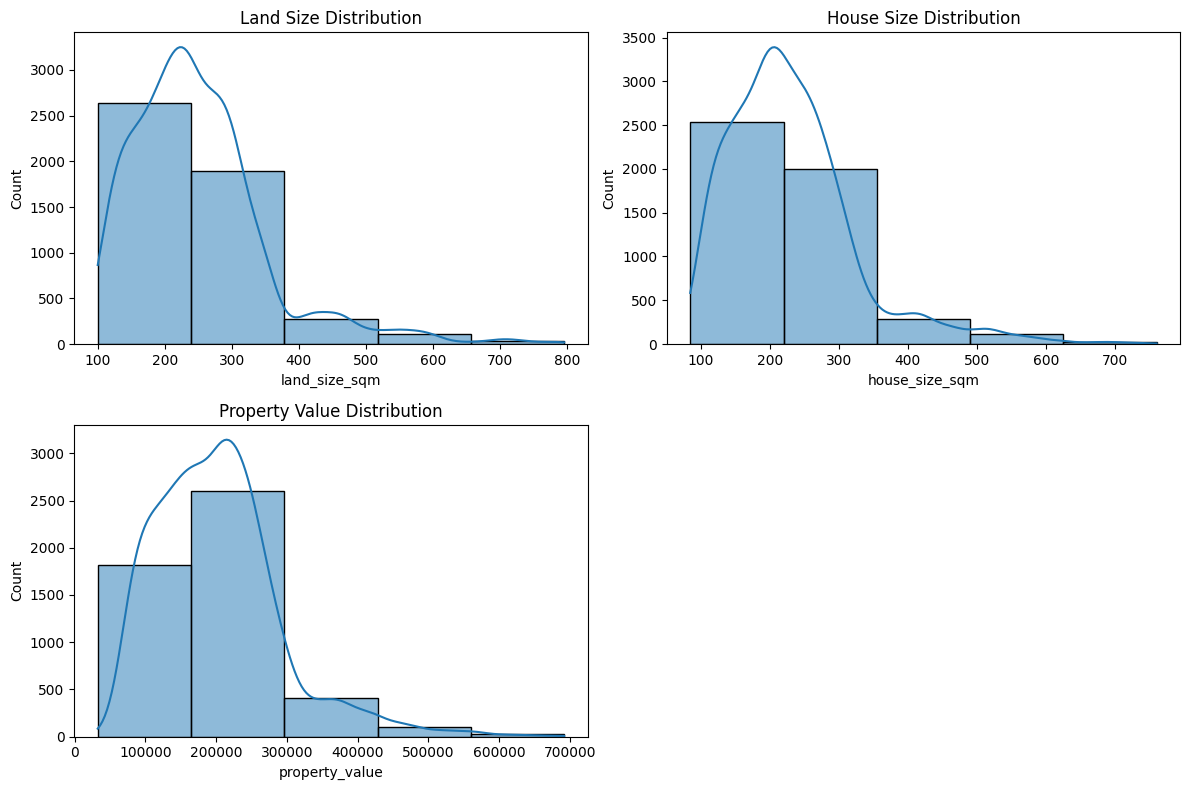

In [200]:
# --- Univariate Analysis ---
plt.figure(figsize=(12, 8))

# Histograms
plt.subplot(2, 2, 1)
sns.histplot(data["land_size_sqm"], kde=True, bins=5)
plt.title("Land Size Distribution")

plt.subplot(2, 2, 2)
sns.histplot(data["house_size_sqm"], kde=True, bins=5)
plt.title("House Size Distribution")

plt.subplot(2, 2, 3)
sns.histplot(data["property_value"], kde=True, bins=5)
plt.title("Property Value Distribution")

plt.tight_layout()
plt.show()

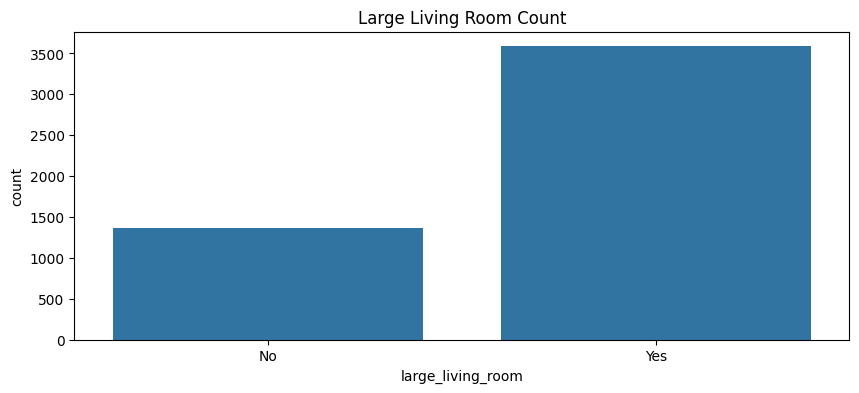

In [201]:
# Bar plots for categorical features
plt.figure(figsize=(10, 4))
sns.countplot(x="large_living_room", data=data)
plt.title("Large Living Room Count")
plt.show()

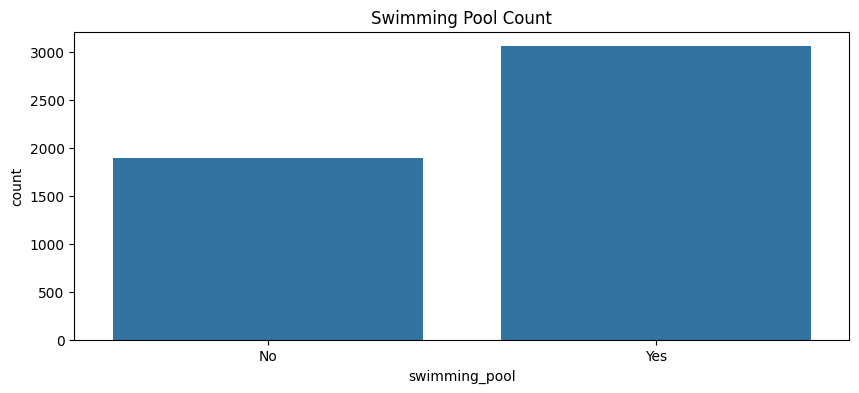

In [202]:
plt.figure(figsize=(10, 4))
sns.countplot(x="swimming_pool", data=data)
plt.title("Swimming Pool Count")
plt.show()



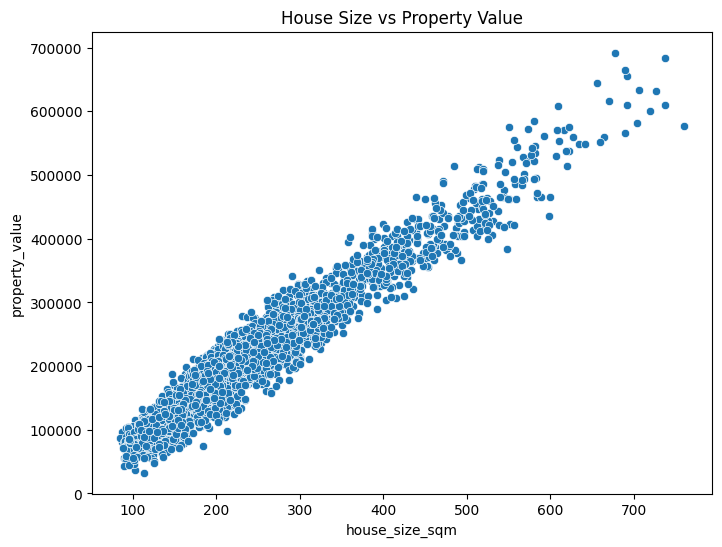

In [203]:
# --- Bivariate Analysis ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x="house_size_sqm", y="property_value", data=data)
plt.title("House Size vs Property Value")
plt.show()



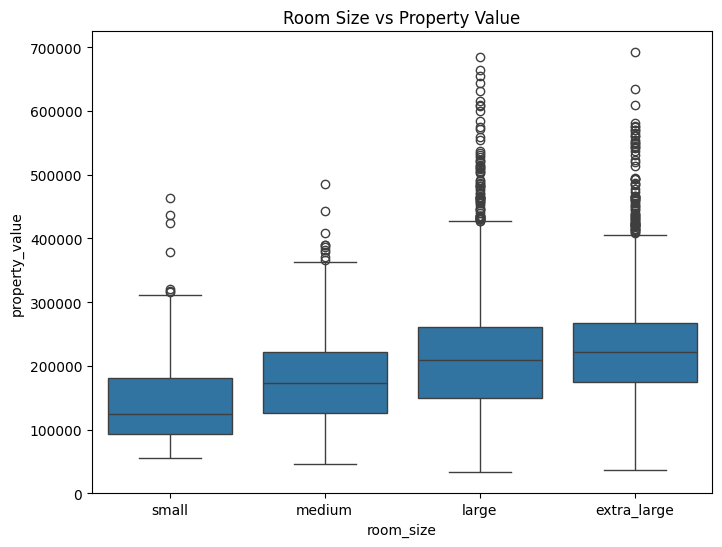

In [204]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="room_size", y="property_value", data=data)
plt.title("Room Size vs Property Value")
plt.show()



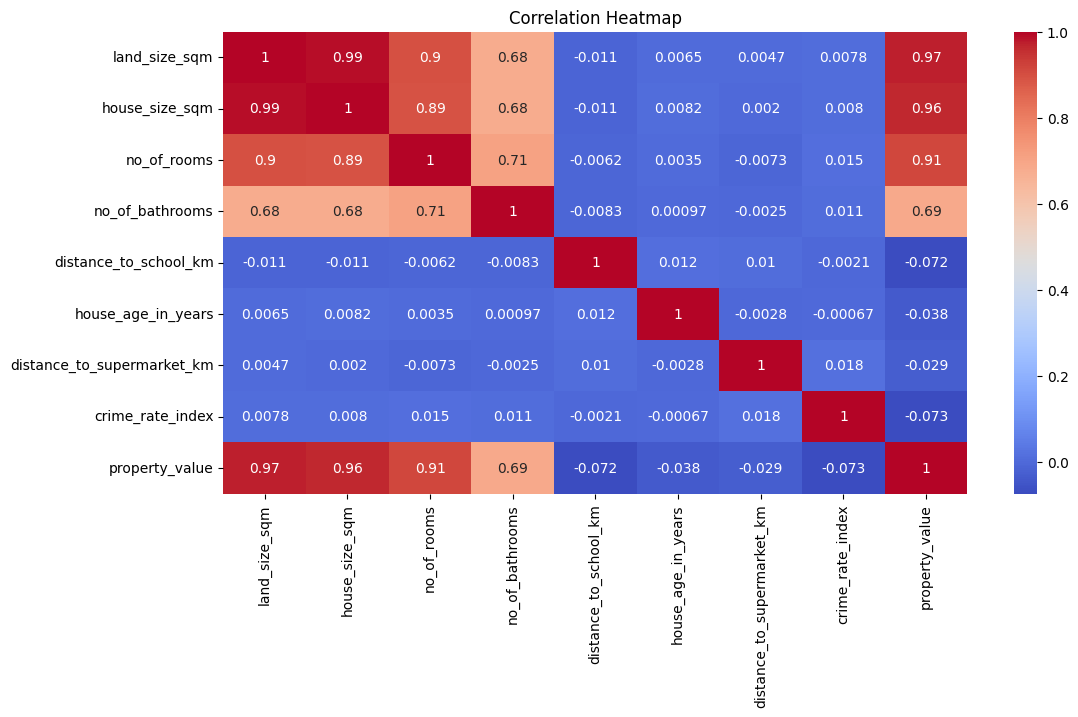

In [205]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

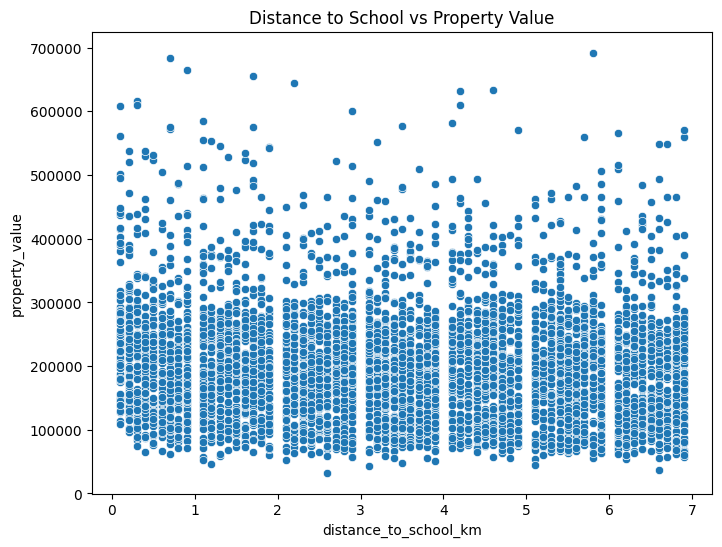

In [206]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="distance_to_school_km", y="property_value", data=data)
plt.title("Distance to School vs Property Value")
plt.show()



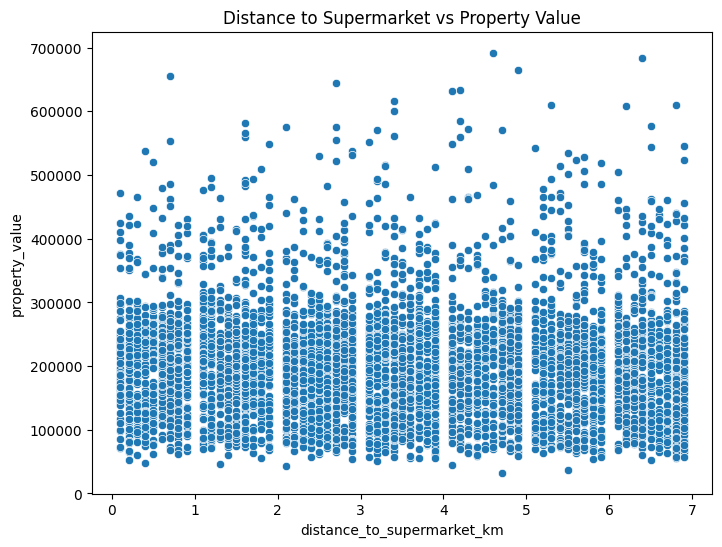

In [207]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="distance_to_supermarket_km", y="property_value", data=data)
plt.title("Distance to Supermarket vs Property Value")
plt.show()

In [208]:
print(data['large_living_room'].unique())
print(data['parking_space'].unique())
print(data['front_garden'].unique())
print(data['swimming_pool'].unique())
print(data['wall_fence'].unique())
print(data['room_size'].unique())

['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['small' 'medium' 'large' 'extra_large']


In [209]:
binary_cols = ['large_living_room', 'parking_space', 'front_garden', 'swimming_pool', 'wall_fence', 'water_front']

# Map Yes → 1, No → 0
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})


In [210]:
data["room_size"] = data["room_size"].map({'small': 0, 'medium': 1, 'large': 2, 'extra_large': 3})


In [211]:
data.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school_km,wall_fence,house_age_in_years,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8,0.90,0,165432
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1,1.42,1,187043
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1,4.12,1,148658
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7,4.36,0,123785
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7,0.42,0,156470


In [212]:
print(data.duplicated().sum())


0


# Feature Engineering

In [213]:
data['house_to_land_ratio'] = data['house_size_sqm'] / data['land_size_sqm']

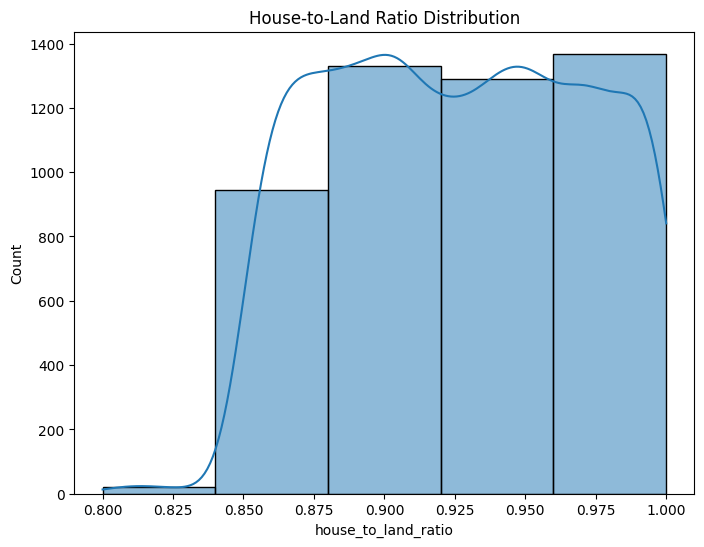

In [214]:
# --- Derived Features ---
plt.figure(figsize=(8, 6))
sns.histplot(data["house_to_land_ratio"], bins=5, kde=True)
plt.title("House-to-Land Ratio Distribution")
plt.show()


In [215]:
data.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school_km,wall_fence,house_age_in_years,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value,house_to_land_ratio
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8,0.90,0,165432,0.880597
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1,1.42,1,187043,0.928571
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1,4.12,1,148658,0.919192
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7,4.36,0,123785,0.932584
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7,0.42,0,156470,0.901639


# Splitting Dataset into test and train

In [216]:
X = data.drop(columns=['property_value'])
y = data['property_value']

In [218]:
print(data.shape)


(4954, 17)


In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [223]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [224]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [225]:
print("R^2 Score:", model.score(X_test_scaled, y_test))


R^2 Score: 0.9884853118286641


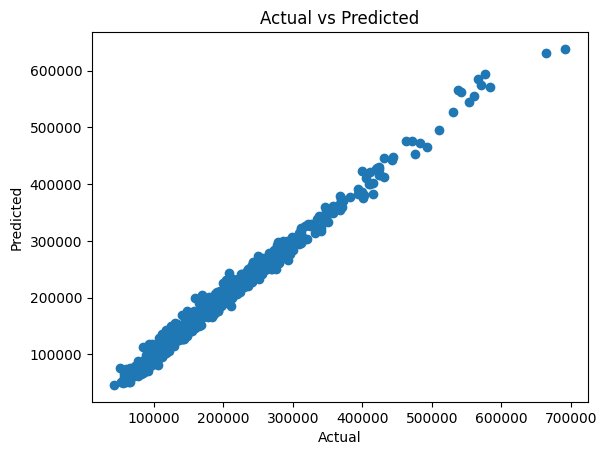

In [ ]:
y_pred = model.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


In [231]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# R2
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

# RMSE
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.9880568028203963
Test R²: 0.9884853118286641
Train RMSE: 9852.2297794994
Test RMSE: 9603.659963984297


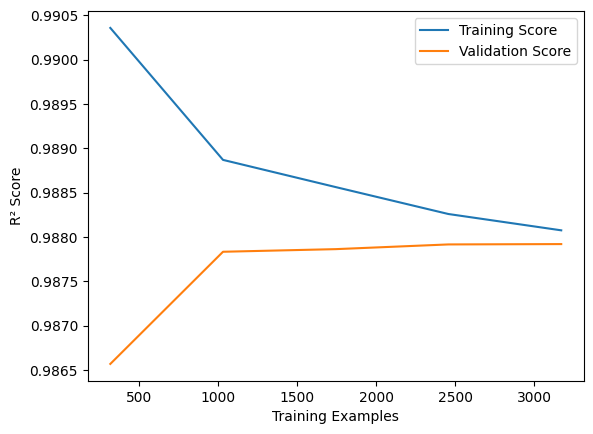

In [ ]:


train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("R² Score")
plt.legend()
plt.show()


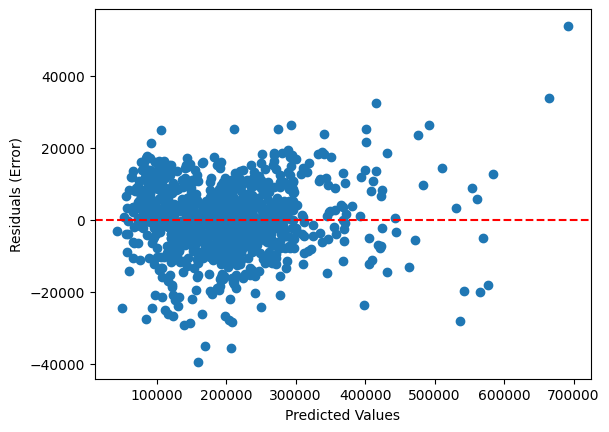

In [233]:
plt.scatter(y_test, y_test - y_test_pred)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Error)")
plt.show()


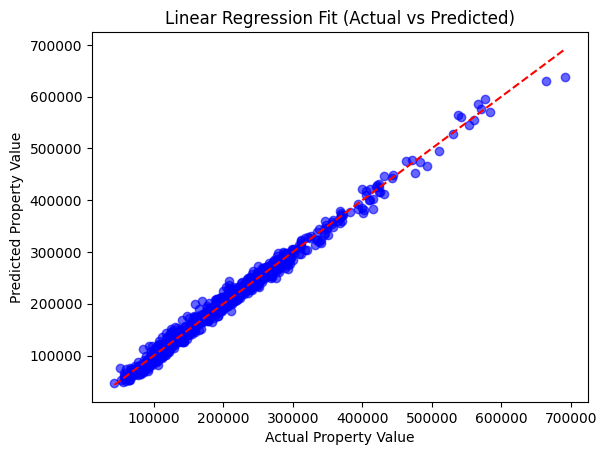

In [234]:
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test_scaled)

plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect fit line
plt.xlabel("Actual Property Value")
plt.ylabel("Predicted Property Value")
plt.title("Linear Regression Fit (Actual vs Predicted)")
plt.show()


d:\GenAI Challenge\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


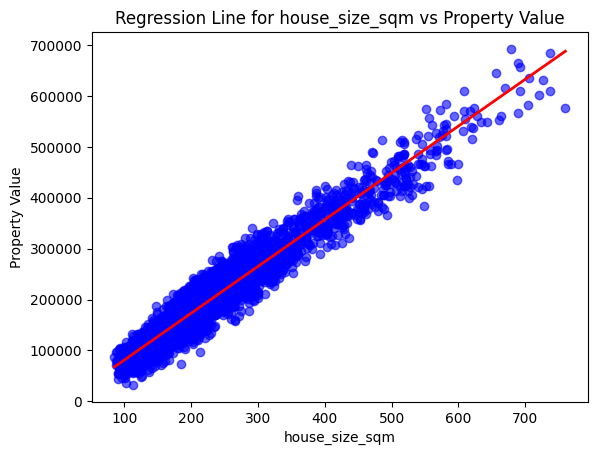

In [235]:
import numpy as np

# Choose one feature (e.g., house_size_sqm)
feature = 'house_size_sqm'
X_feature = data[[feature]]
y = data['property_value']

# Fit a simple linear regression on this one feature
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_feature, y)

# Predictions
x_vals = np.linspace(X_feature.min(), X_feature.max(), 100).reshape(-1, 1)
y_vals = reg.predict(x_vals)

plt.scatter(X_feature, y, alpha=0.6, color="blue")
plt.plot(x_vals, y_vals, color="red", linewidth=2)
plt.xlabel(feature)
plt.ylabel("Property Value")
plt.title(f"Regression Line for {feature} vs Property Value")
plt.show()


In [236]:
# save the model and scaler
import joblib
joblib.dump(model, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [237]:
data.columns

Index(['land_size_sqm', 'house_size_sqm', 'no_of_rooms', 'no_of_bathrooms',
       'large_living_room', 'parking_space', 'front_garden', 'swimming_pool',
       'distance_to_school_km', 'wall_fence', 'house_age_in_years',
       'water_front', 'distance_to_supermarket_km', 'crime_rate_index',
       'room_size', 'property_value', 'house_to_land_ratio'],
      dtype='object')

In [239]:
data.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school_km,wall_fence,house_age_in_years,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value,house_to_land_ratio
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8,0.90,0,165432,0.880597
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1,1.42,1,187043,0.928571
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1,4.12,1,148658,0.919192
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7,4.36,0,123785,0.932584
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7,0.42,0,156470,0.901639


In [240]:
print(data.dtypes)

land_size_sqm                   int64
house_size_sqm                  int64
no_of_rooms                     int64
no_of_bathrooms                 int64
large_living_room               int64
parking_space                   int64
front_garden                    int64
swimming_pool                   int64
distance_to_school_km         float64
wall_fence                      int64
house_age_in_years              int64
water_front                     int64
distance_to_supermarket_km    float64
crime_rate_index              float64
room_size                       int64
property_value                  int64
house_to_land_ratio           float64
dtype: object
